In [ ]:
# Plik beauty zawiera dane z pracy Hamermesha i Parker (2005) na temat oceny piękna instruktorów 
# i jakości uch nauczania dla kilku kursów na University of Texas. Oceny dydaktyczne przeprowadzono 
# pod koniec semestru, a oceny urody dokonano później przez sześciu studentów, którzy nie uczestniczyli 
# w zajęciach i nie byli świadomi ocen kursu.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def abline(intercept, slope):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color='r')


# Wczytanie danych
df = pd.read_csv("beauty.csv")
df

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
0,0,1,1,36,6,5,7,6,2,4,...,0,0,55.81395,4.7,43,1,0,2.129806,0.201567,0.000000
1,1,2,0,59,2,4,4,3,2,3,...,0,0,85.00000,4.6,20,1,0,1.386081,0.000000,-0.826081
2,1,3,0,51,5,5,2,3,2,3,...,0,0,100.00000,4.1,55,1,0,2.537435,0.000000,-0.660333
3,1,4,0,40,4,2,5,2,3,3,...,0,0,86.95652,4.5,46,1,0,1.760577,0.000000,-0.766312
4,0,5,0,31,9,7,9,6,7,6,...,0,0,87.50000,4.8,48,1,0,1.693100,1.421450,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0,93,0,32,9,6,6,5,7,8,...,0,0,42.85714,4.1,21,1,0,3.107088,1.143040,0.000000
459,0,93,0,32,9,6,6,5,7,8,...,0,0,60.46511,4.5,86,1,0,3.107088,1.143040,0.000000
460,0,94,1,42,7,3,8,4,4,6,...,1,0,77.61194,4.4,67,1,0,3.018447,0.332051,0.000000
461,0,94,1,42,7,3,8,4,4,6,...,1,0,81.81818,4.4,66,1,0,3.018447,0.332051,0.000000


In [3]:
import statsmodels.formula.api as smf

model = smf.ols('courseevaluation ~ btystdave', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           4.25e-05
Time:                        15:17:22   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0100      0.026    157.205      0.000       3.960       4.060
btystdave      0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# Parametry modelu - wspolczynniki linii regresji:
intercept = model.params['Intercept']  # Punkt przecięcia z osia wartosci
btystdave = model.params['btystdave']  # wspolczynnik nachylenia prostej
print(intercept)
print(btystdave)

4.010022686693951
0.13300144672613406


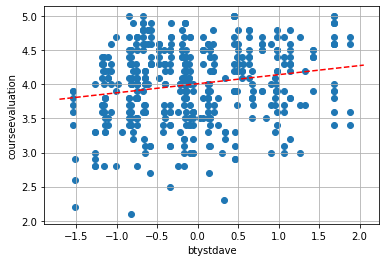

In [5]:
plt.scatter(df.btystdave, df.courseevaluation)
abline(intercept, btystdave)
plt.xlabel("btystdave")
plt.ylabel("courseevaluation")
plt.grid()
plt.show()

In [6]:
# Model oparty o wiecej zmiennych
model2 = smf.ols('courseevaluation ~ btystdave + btystdf2u + btystdfu + btystdfl + btystdm2u + btystdml', data=df).fit()
model2.summary()
params = model2.params
print(params)

Intercept    4.012865
btystdave    0.463792
btystdf2u   -0.052735
btystdfu    -0.000972
btystdfl    -0.090635
btystdm2u   -0.038745
btystdml    -0.150004
dtype: float64


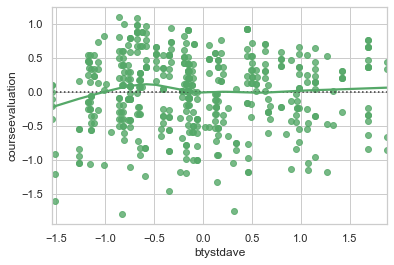

In [7]:
# Residua

sns.set(style="whitegrid")
sns.residplot(x=df.btystdave, y=df.courseevaluation, lowess=True, color='g')
plt.show()

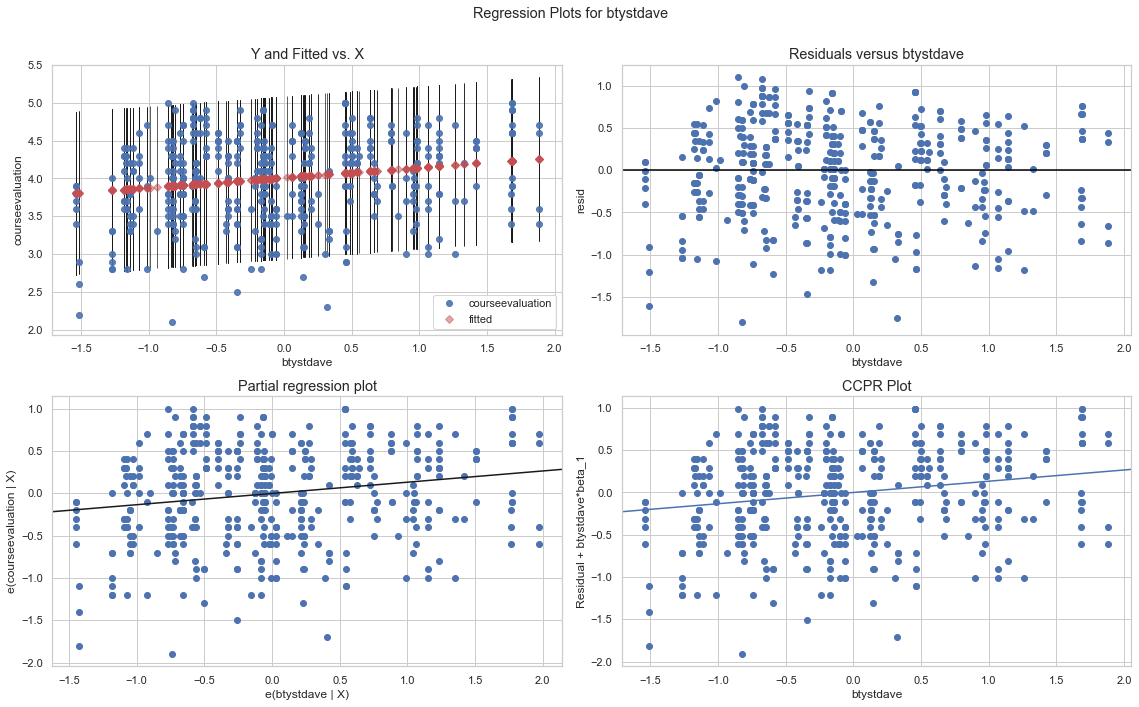

In [8]:
import statsmodels.api as sm

fig = plt.figure(figsize=(16,10))
fig = sm.graphics.plot_regress_exog(model, 'btystdave', fig=fig)

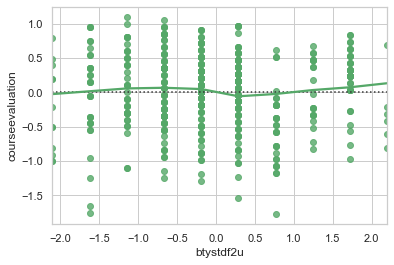

In [9]:
sns.set(style="whitegrid")
sns.residplot(x=df.btystdf2u, y=df.courseevaluation, lowess=True, color='g')
plt.show()

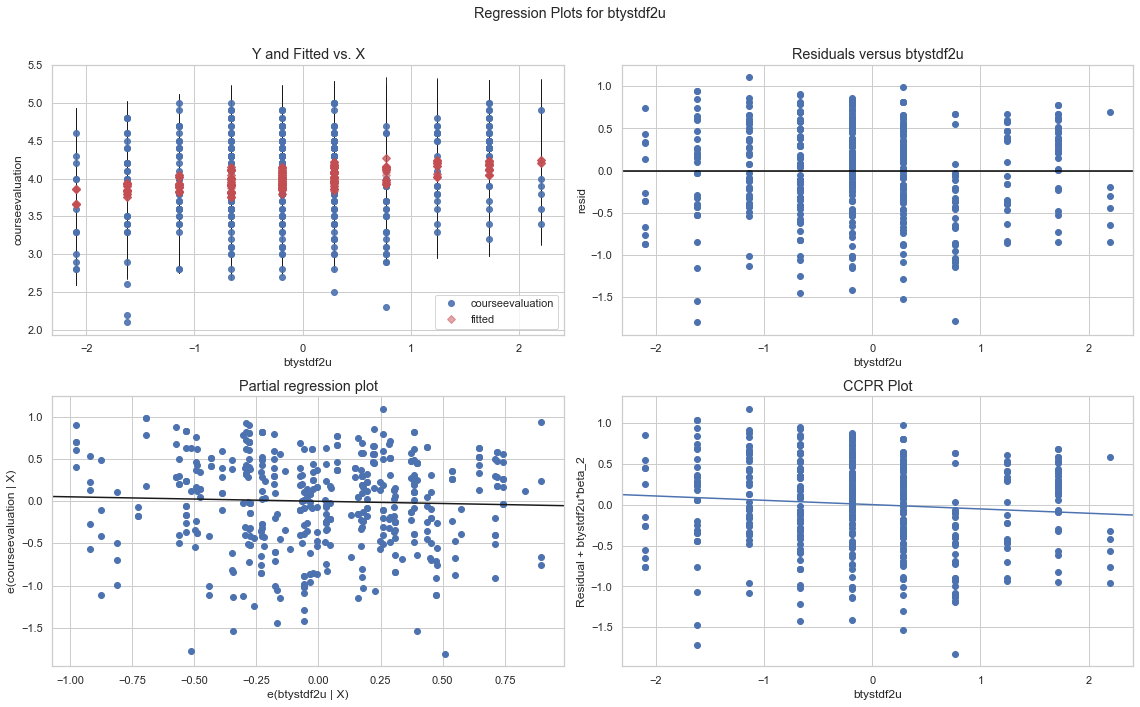

In [10]:
fig = plt.figure(figsize=(16,10))
fig = sm.graphics.plot_regress_exog(model2, 'btystdf2u', fig=fig)

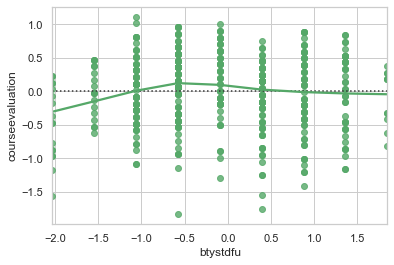

In [11]:
sns.set(style="whitegrid")
sns.residplot(x=df.btystdfu, y=df.courseevaluation, lowess=True, color='g')
plt.show()

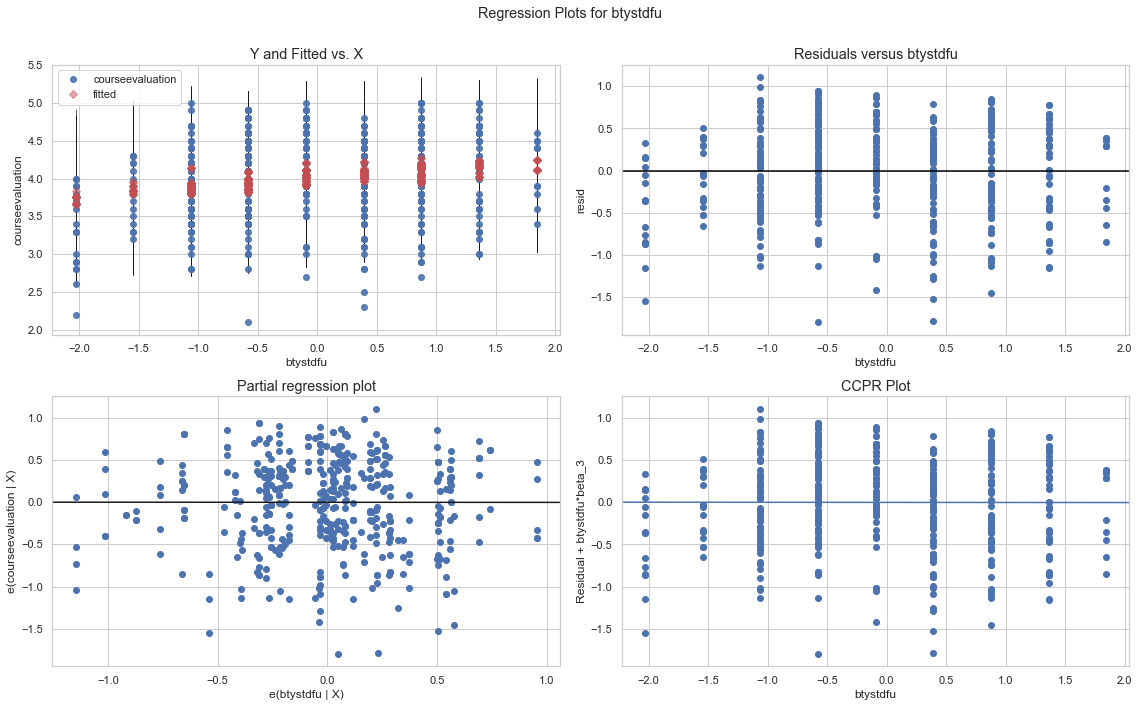

In [12]:
fig = plt.figure(figsize=(16,10))
fig = sm.graphics.plot_regress_exog(model2, 'btystdfu', fig=fig)

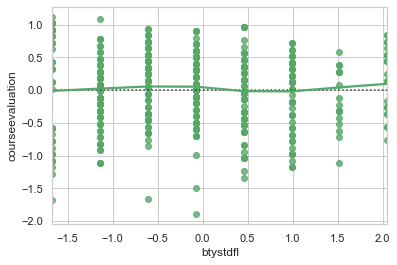

In [13]:
sns.set(style="whitegrid")
sns.residplot(x=df.btystdfl, y=df.courseevaluation, lowess=True, color='g')
plt.show()

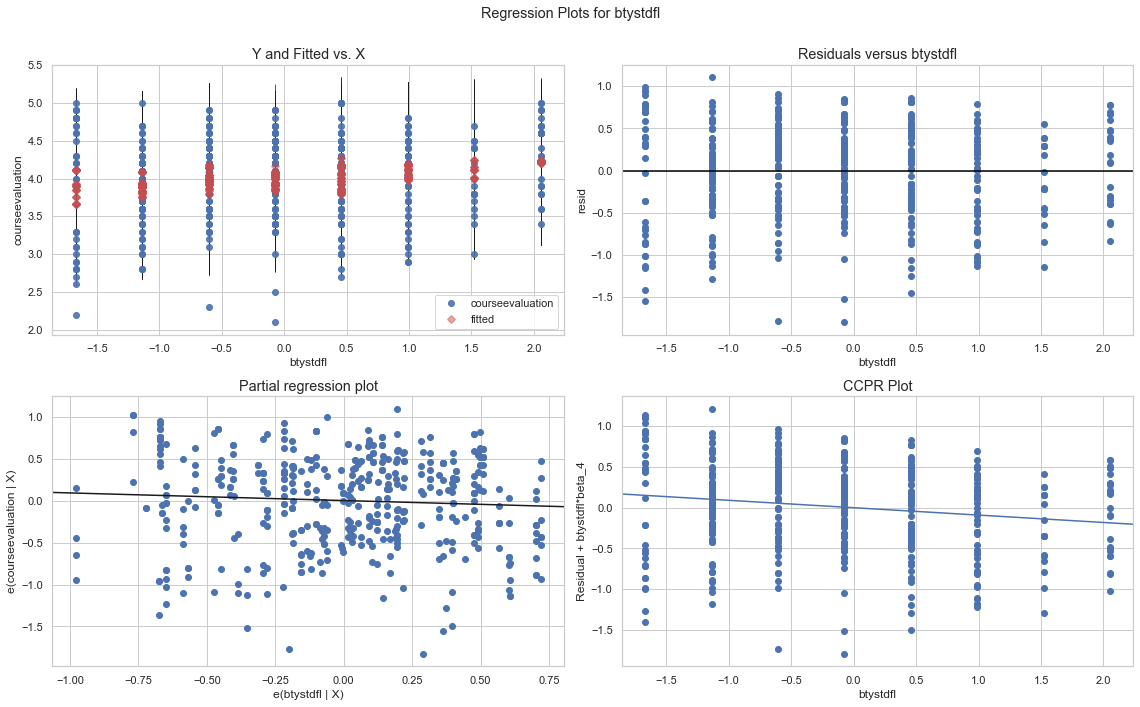

In [14]:
fig = plt.figure(figsize=(16,10))
fig = sm.graphics.plot_regress_exog(model2, 'btystdfl', fig=fig)

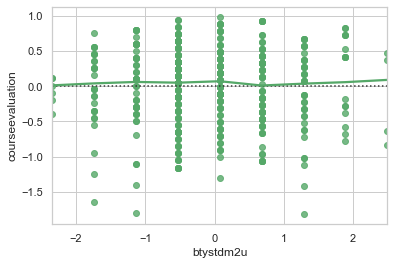

In [15]:
sns.set(style="whitegrid")
sns.residplot(x=df.btystdm2u, y=df.courseevaluation, lowess=True, color='g')
plt.show()

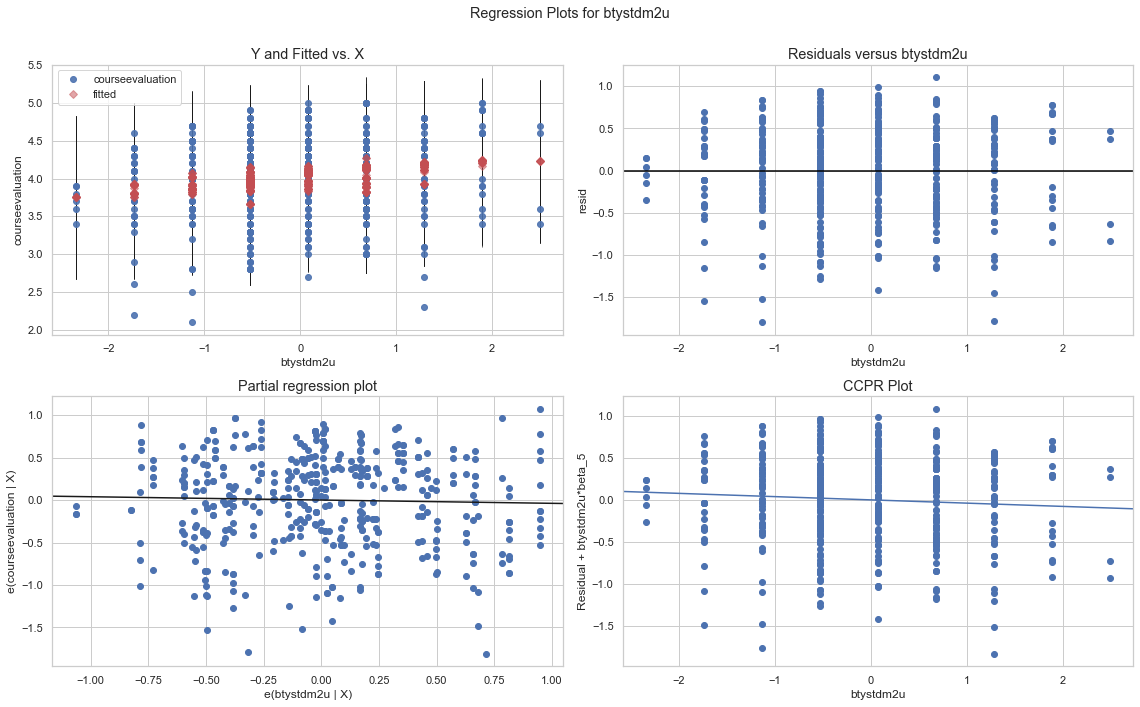

In [16]:
fig = plt.figure(figsize=(16,10))
fig = sm.graphics.plot_regress_exog(model2, 'btystdm2u', fig=fig)

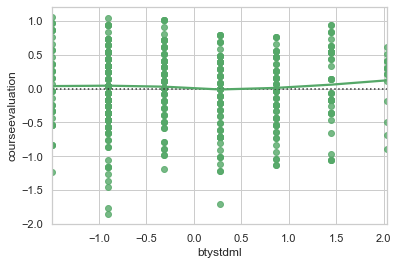

In [17]:
sns.set(style="whitegrid")
sns.residplot(x=df.btystdml, y=df.courseevaluation, lowess=True, color='g')
plt.show()

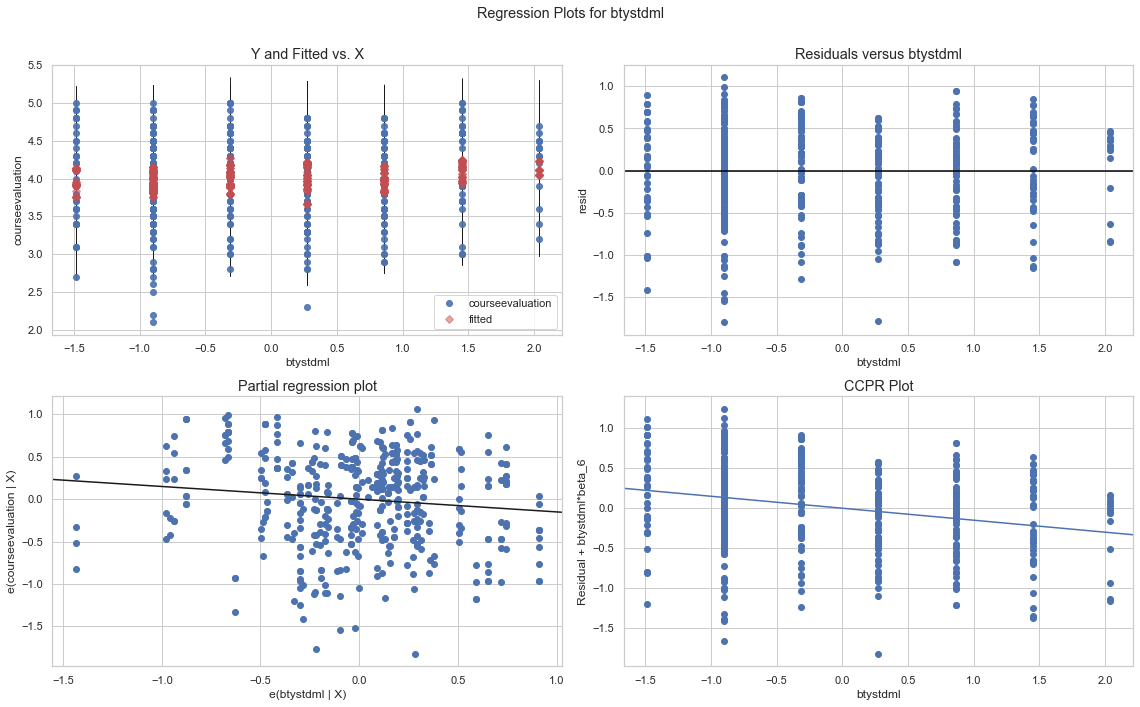

In [18]:
fig = plt.figure(figsize=(16,10))
fig = sm.graphics.plot_regress_exog(model2, 'btystdml', fig=fig)